# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Futures Continuations

To build a futures continuation, you need to adjust the contracts back in time. This is done because, at expiry, there can be a price difference between the first contract and the second contract. This price jump is artificially introduced in the continuation if we do not adjust it. The simplest way to adjust it is by adding/subtracting a factor so that the last value of the first contract matches the first value of the second contract. This way you can get a continuous time series.

A drawback of the adjustment by addition is that long term time series can sometimes go negative after many years of such adjustments. Another drawback is that percentage changes are not kept intact, which makes the calculation of returns difficult.

To avoid this problem, you can use proportional adjustment. In proportional adjustment, when you are rolling from one month to the next, the first contract is shifted by a ratio instead of adding a fixed number. The main advantage is that percentage moves are kept intact, making ratio style calculations possible.

In this notebook, you will learn how to perform an adjustment on two contracts.

The notebook is divided into the following parts:

1. [Read the Data](#read)
1. [Proportional Adjustment](#prop_adj)

## Import Libraries

In [1]:
# Import matplotlib and set the style for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Data manipulation library
import pandas as pd

# Ignore warnings for future deprecation
import warnings
warnings.filterwarnings("ignore")

<a id='read'></a>
## Read the Data

Here we will read two futures contracts. These two contracts are the futures data for Lean Hogs of October 2020 and December 2020 expiry. The data files used in this notebook are available in the downloadable zip file in the last section of this course. If you want to work with futures data of your own choice, you can refer to the different sources of historical futures data available in the next unit.

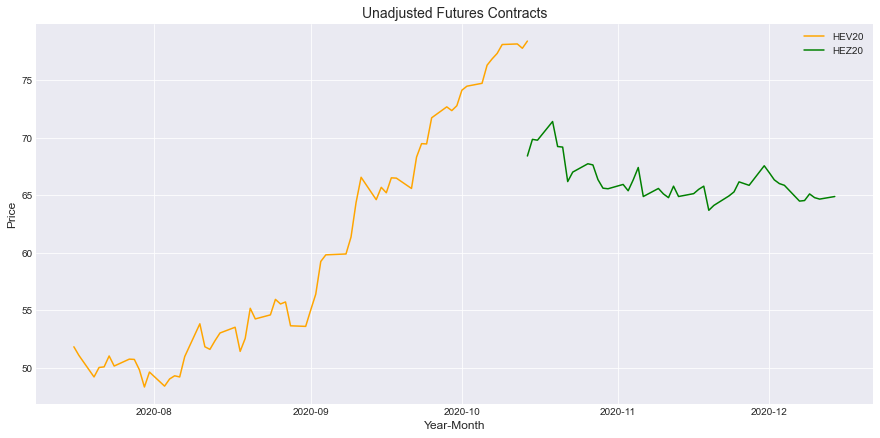

In [2]:
# Path to read the data files
path = "../data_modules/"

# Read the data
# First contract: Lean Hogs October 2020 Futures
first_contract_data = pd.read_csv(path + "HEV20.csv",
                                  index_col=0, parse_dates=True)

# Second contract: Lean Hogs December 2020 Futures
second_contract_data = pd.read_csv(path + "HEZ20.csv",
                                   index_col=0, parse_dates=True)

# Define the plot size
plt.figure(figsize=(15, 7))
plt.title('Unadjusted Futures Contracts', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Plotting the first contract
plt.plot(first_contract_data.Settle, label="HEV20", color='orange')

# Plotting the second contract, after the first contract expires
first_contract_expiry = first_contract_data.index.max()
plt.plot(second_contract_data.Settle.loc[first_contract_expiry:],
         label="HEZ20", color='green')

# Adding the legend
plt.legend()

# Show the plot
plt.show()

<a id='prop_adj'></a>
## Proportional adjustment

The two contracts will be made continuous by proportional adjustment. The ratio of the price of the second contract to the first contract (on the expiry date of the first contract) is the proportional adjustment factor.

You can get continuous futures data using the following steps:
1. Get the price of the `first` contract and the `next` contract on the `rollover` date.<br>The `rollover` date is the date when you rolled your position from the first contract to the second contract.<br>In this notebook, we have considered the `rollover` date as the `expiry` date. That is, on the first contract expiry date, we will rollover from the first contract to next month's contract.
1. Calculate the adjustment factor as:
$$ \text{Adjustment factor} = \frac{\text{Second contract's price}}{\text{First contract's price}} $$<br>
1. Store the first contract's data in the variable named `continuous_futures_proportional`.
1. Multiply the adjustment factor to the `continuous_futures_proportional` till the expiry of the first contract.
1. Append the second contract to `continuous_futures_proportional` to get the continuous data.

The price of the first contract on 2020-10-14 00:00:00 is $78.425.
The price of the second contract on 2020-10-14 00:00:00 is $68.425.
The adjustment factor to multiply to the first contract is 0.872.


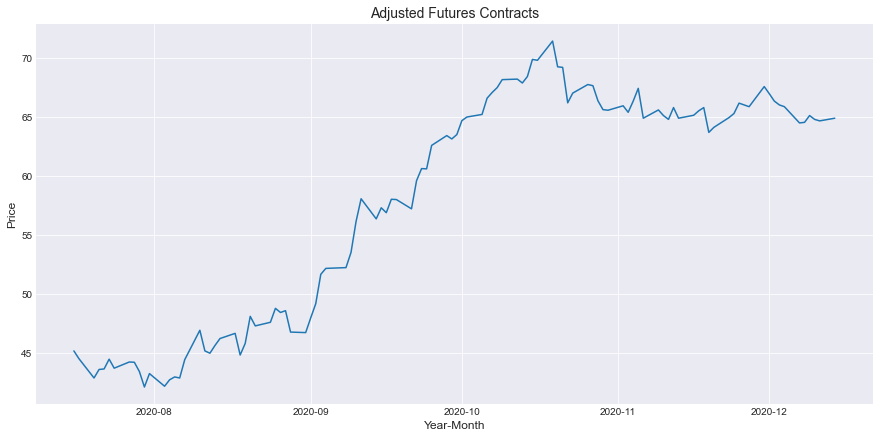

In [3]:
# First contract price
first_contract_on_expiry = first_contract_data.loc[first_contract_expiry].Settle

# Second contract price
second_contract_on_rollover = second_contract_data.loc[first_contract_expiry].Settle

# Proportional adjustment factor
adjustment_factor = \
    second_contract_on_rollover / first_contract_on_expiry

# Define the variable to store the continuous series
continuous_futures_proportional = pd.Series()

# Make the continuous futures series without adjustment
continuous_futures_proportional = \
    continuous_futures_proportional.append(
        first_contract_data.loc[:first_contract_expiry].Settle)

# Multiply the adjustment factor to the continuous series till the expiry of the first contract
continuous_futures_proportional.loc[:first_contract_expiry] *= adjustment_factor

continuous_futures_proportional = \
    continuous_futures_proportional.append(
        second_contract_data.loc[first_contract_expiry:].Settle)

# Print the prices
print("The price of the first contract on {} is ${}."
      .format(first_contract_expiry, first_contract_on_expiry))
print("The price of the second contract on {} is ${}."
      .format(first_contract_expiry, second_contract_on_rollover))
print("The adjustment factor to multiply to the first contract is {}."
      .format(round(adjustment_factor, 3)))

# Define the plot size
plt.figure(figsize=(15, 7))
plt.title('Adjusted Futures Contracts', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Plotting the continuous contract
plt.plot(continuous_futures_proportional)

# Show the plot
plt.show()

The proportional adjustment you have done here is technically called the `end-to-end roll` with the `backwards ratio` method. 

1. The `end-to-end roll` means rolling the contract on the expiry date of the first contract.

1. The `backwards ratio` method is another name for the proportional adjustment where the price of the current contract is preserved, and the previous contracts are adjusted.

The data used in the notebooks are available in the downloadable zip file in the last section of the course. If you would like to work with different data, you can check out the additional reading list for the sources of futures data listed in the additional reading at the end of this section.
<br><br>